**Applications of the xG model**

- Analyzing players
- Telling the story of a match
- Analyzing teams

Import required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
plt.style.use('fivethirtyeight')

In [2]:
filepath = "C:\\Users\\anike\\PycharmProjects\\Soccer-Analytics\\Soccer-Analytics\\open-data\\data\\matches\\"
comp = "43"
season = "3"
season_path = filepath+comp+"/"+season+".json"

In [3]:
from collections import defaultdict

In [6]:
#dictionary to hold match meta information
match_dict=defaultdict(list)

#dataframe to hold match data from the 2018 World Cup
df_matches=pd.read_json(season_path)
df_matches.head()

,away_score,away_team,competition,competition_stage,home_score,home_team,kick_off,last_updated,match_date,match_id,match_status,match_week,metadata,referee,season,stadium
0,2,"{'away_team_id': 784, 'away_team_name': 'Peru'...","{'competition_id': 43, 'country_name': 'Intern...","{'id': 10, 'name': 'Group Stage'}",0,"{'home_team_id': 792, 'home_team_name': 'Austr...",16:00:00.000,2019-12-16T23:09:16.168756,2018-06-26,7562,available,3,{'data_version': '1.0.2'},"{'id': 725, 'name': 'S. Karasev'}","{'season_id': 3, 'season_name': '2018'}","{'id': 249, 'name': 'Olimpiyskiy Stadion Fisht..."
1,0,"{'away_team_id': 793, 'away_team_name': 'Icela...","{'competition_id': 43, 'country_name': 'Intern...","{'id': 10, 'name': 'Group Stage'}",2,"{'home_team_id': 775, 'home_team_name': 'Niger...",17:00:00.000,2019-12-16T23:09:16.168756,2018-06-22,7549,available,2,{'data_version': '1.0.2'},"{'id': 739, 'name': 'M. Conger'}","{'season_id': 3, 'season_name': '2018'}","{'id': 4257, 'name': 'Volgograd Arena', 'count..."
2,2,"{'away_team_id': 781, 'away_team_name': 'Brazi...","{'competition_id': 43, 'country_name': 'Intern...","{'id': 10, 'name': 'Group Stage'}",0,"{'home_team_id': 786, 'home_team_name': 'Serbi...",20:00:00.000,2019-12-16T23:09:16.168756,2018-06-27,7565,available,3,{'data_version': '1.0.2'},"{'id': 741, 'name': 'A. Faghani'}","{'season_id': 3, 'season_name': '2018'}","{'id': 4130, 'name': 'Otkrytiye Arena', 'count..."
3,1,"{'away_team_id': 776, 'away_team_name': 'Denma...","{'competition_id': 43, 'country_name': 'Intern...","{'id': 33, 'name': 'Round of 16'}",1,"{'home_team_id': 785, 'home_team_name': 'Croat...",20:00:00.000,2019-12-16T23:09:16.168756,2018-07-01,7581,available,3,{'data_version': '1.0.2'},"{'id': 730, 'name': 'N. Pitana'}","{'season_id': 3, 'season_name': '2018'}","{'id': 4263, 'name': 'Stadion Nizhny Novgorod'..."
4,1,"{'away_team_id': 780, 'away_team_name': 'Portu...","{'competition_id': 43, 'country_name': 'Intern...","{'id': 10, 'name': 'Group Stage'}",1,"{'home_team_id': 797, 'home_team_name': 'Iran'...",20:00:00.000,2019-12-16T23:09:16.168756,2018-06-25,7557,available,3,{'data_version': '1.0.2'},"{'id': 731, 'name': 'E. CÃ¡ceres'}","{'season_id': 3, 'season_name': '2018'}","{'id': 4259, 'name': 'Mordovia Arena', 'countr..."


In [15]:
# df_matches.shape[0]
df_matches.columns.get_loc("match_id")
df_matches.columns.get_loc("home_team")
df_matches.columns.get_loc("away_team")

1

In [16]:
#populating the match dictionary with match ids as keys, home and away team names as values
for i in range(0,df_matches.shape[0]):
    key = df_matches.iloc[i,9]
    values=[df_matches.iloc[i,5]['home_team_name'],df_matches.iloc[i,1]['away_team_name']]
    match_dict[key]=values
    
    
len(match_dict.keys())

64

In [17]:
#initializing lists which will be used to create our events-data dataframe
eventspath = "C:\\Users\\anike\\PycharmProjects\\Soccer-Analytics\\Soccer-Analytics\\open-data\\data\\events\\"
match_id_list=[] #id of match
home_list=[] #home team
away_list=[] #away team
shots_list=[] # all shots
loc_list=[] #all shot locations
timestamp_list=[] #time at which shot was taken
outcome_name_list = [] #all shot outcomes
outcome_id_list=[] #all shot outcome ids as per data
bodypart_name_list = [] #bodypart involved in shot
bodypart_id_list=[] #bodypart ids as per data
technique_name_list = [] #technique used in shot
technique_id_list=[] #technique ids as per data
type_name_list = [] #play pattern names
type_id_list=[] #play pattern ids
first_time_list=[] #whether shot was taken without a preceding touch 
statsbomb_xg_list = [] #statsbomb's xG prediction
key_pass_type_list=[] #the key pass leading up to the shot
key_pass_pattern_list=[] # type of key pass event
player_list=[] #the player who took the shot
team_list=[] #the team the player belongs to
preceding_event_list=[]#the event preceding the shot
preceding_event_player_list=[]#the player involved in preceding event
preceding_event_team_list=[]#the team of the player involved
cross_list=[]#whether a key pass is a cross
cutback_list=[]#whether a key pass is a cutback

In [18]:
#extracting the above information
for match, teams in match_dict.items():
    matchname = str(match)
    path = eventspath+matchname+".json"
    df_events=pd.read_json(path)
    df_shots = df_events[['index','timestamp','shot','location','player','possession_team','team']].dropna()
    shots_list.append(df_shots.dropna().shape[0])
    loc_list.extend(list(df_shots['location'].values))
    timestamp_list.extend(list(df_shots['timestamp'].values))
    for i in range(0,len(df_shots)):
        match_id_list.append(match)
        home_list.append(teams[0])
        away_list.append(teams[1])
        outcome_name_list.append(df_shots.iloc[i][2]['outcome']['name'])
        outcome_id_list.append(df_shots.iloc[i][2]['outcome']['id'])
        bodypart_name_list.append(df_shots.iloc[i][2]['body_part']['name'])
        bodypart_id_list.append(df_shots.iloc[i][2]['body_part']['id'])
        technique_name_list.append(df_shots.iloc[i][2]['technique']['name'])
        technique_id_list.append(df_shots.iloc[i][2]['technique']['id'])
        type_name_list.append(df_shots.iloc[i][2]['type']['name'])
        type_id_list.append(df_shots.iloc[i][2]['type']['id'])
        player_list.append(df_shots.iloc[i][4]['name'])
        team_list.append(df_shots.iloc[i][5]['name'])
        
        #Whether a shot was a first time shot is indicated by a Boolean. Many shots are not first time shots
        #Error handling is used to not stop data extraction
        try:
            first_time_list.append(df_shots.iloc[i][2]['first_time'])
        except:
            first_time_list.append(False)
        
        #Many shots do not have a preceding key pass. Error handling is used in such cases
        try:
            key_pass = df_shots.iloc[i][2]['key_pass_id']
            filt1 = df_events['id']==key_pass
            pass_info = df_events[filt1].dropna(axis='columns')['pass']
            key_pass_type_list.append(pass_info.iloc[0]['height']['name'])
            pattern_info = df_events[filt1].dropna(axis='columns')['play_pattern']
            key_pass_pattern_list.append(pattern_info.iloc[0]['name'])
            try:
                if pass_info.iloc[0]['cross']==True:
                    cross_list.append(True)
                else:
                    cross_list.append(False)
            except KeyError:
                cross_list.append(False)
            try:
                if pass_info.iloc[0]['cut_back']==True:
                    cutback_list.append(True)
                else:
                    cutback_list.append(False)
            except KeyError:
                cutback_list.append(False)
                
        except KeyError:
            key_pass_type_list.append(np.nan)
            cutback_list.append(False)
            cross_list.append(False)
            key_pass_pattern_list.append(np.nan)
        #Extracting the event preceding the shot
        idx_filt = df_shots.iloc[i,0]-1
        filt = df_events['index']==idx_filt
        df_events_filt=df_events[filt].dropna(axis='columns')
        preceding_event_list.append(df_events_filt['type'].values[0]['name'])
        try:
            preceding_event_player_list.append(df_events_filt['player'].values[0]['name'])
        except:
            preceding_event_player_list.append(np.nan)
        preceding_event_team_list.append(df_events_filt['possession_team'].values[0]['name'])
        
        #extracting statsbomb xG
        statsbomb_xg_list.append(df_shots.iloc[i][2]['statsbomb_xg'])


In [19]:
def vectorize(pointa, pointb):
    '''
    Given two points, create a vector from the first to the second
    
    Arguments:
        pointa, pointb - x,y co-ordinates (list)
    
    Returns:
        vector from point a to point b
    '''
    return [pointb[0]-pointa[0], pointb[1]-pointa[1]]


def isInside(point_shot, point_goal1, point_goal2, point_freeze):
    '''
    Given the three vertices of a triangle, this function determines if a fourth
    point lies inside the triangle
    
    Arguments:
        point_shot - shot location x,y (list)
        point_goal1 and point_goal2 - goal edges x,y (list)
        point_freeze - player location x,y(list)
        
    Returns:
        True or False (boolean)
    
    '''
    v2 = vectorize(point_freeze, point_shot)
    v0 = vectorize(point_goal1, point_shot)
    v1 = vectorize(point_goal2, point_shot)

    u = (np.dot(v1, v1)*np.dot(v2, v0)-np.dot(v1, v0)*np.dot(v2, v1)) / \
        (np.dot(v0, v0)*np.dot(v1, v1)-np.dot(v0, v1)*np.dot(v1, v0))
    v = (np.dot(v0, v0)*np.dot(v2, v1)-np.dot(v0, v1)*np.dot(v2, v0)) / \
        (np.dot(v0, v0)*np.dot(v1, v1)-np.dot(v0, v1)*np.dot(v1, v0))

    if u < 0 or v < 0:
        return False
    elif u > 1 or v > 1:
        return False
    elif u+v > 1:
        return False
    else:
        return True

In [20]:
#defining edges of goal
goal_x1y1 = [120,36]
goal_x2y2 = [120,44]
pack_density_list = [] # initializing a list which will hold pack density values

In [21]:
#creating a pack density list
for match,_ in match_dict.items():
    matchname = str(match)
    path = eventspath+matchname+".json"
    df_events=pd.read_json(path)
    df_shots = df_events[['index','shot','location','player','possession_team']].dropna()
    
    for i in range(0,len(df_shots)):
        shot_loc=df_shots['location'].iloc[i]
        freeze_frame_list=[]
        # in cases of penalties, a freeze frame is not provided so a KeyError will be raised
        # using error handling to append 1 in such cases
        try:
            for j in range(0,len(df_shots['shot'].iloc[i]['freeze_frame'])):
                location=df_shots['shot'].iloc[i]['freeze_frame'][j]['location']
                freeze_frame_list.append(isInside(shot_loc,goal_x1y1,goal_x2y2,location))
        except KeyError:
            freeze_frame_list.append(1) 
        pack_density_list.append(sum(freeze_frame_list))

In [22]:
#creating our dataframe
df = pd.DataFrame(loc_list)

In [23]:
df.columns = ['shot_x','shot_y']
#calculating distance
df['shot_distance']=round(np.sqrt((df['shot_x']-120)**2+(df['shot_y']-40)**2),1)

#calculating angle using cosine rule
df['shot_a'] = np.sqrt((df['shot_x']-120)**2+(df['shot_y']-36)**2)
df['shot_b']=np.sqrt((df['shot_x']-120)**2+(df['shot_y']-44)**2)
df['shot_angle']=np.arccos((df['shot_a']**2+df['shot_b']**2-64)/(2*df['shot_a']*df['shot_b']))
df['shot_angle']=np.degrees(df['shot_angle'])
df['shot_angle']=round(df['shot_angle'],1)

In [24]:
#creating other columns
df['match_id']=match_id_list
df['home_team']=home_list
df['away_team']=away_list
df['timestamp']=timestamp_list
df['outcome_name']=outcome_name_list
df['outcome_id']=outcome_id_list
df['body_part_name']=bodypart_name_list
df['body_part_id']=bodypart_id_list
df['technique_name']=technique_name_list
df['technique_id']=technique_id_list
df['type_name']=type_name_list
df['type_id']=type_id_list
df['first_time']=first_time_list
df['preceding_event']=preceding_event_list
df['pack_density']=pack_density_list
df['shot_player']=player_list
df['shot_team']=team_list
df['key_pass_type']=key_pass_type_list
df['key_pass_pattern']=key_pass_pattern_list
df['isCross']=cross_list
df['isCutback']=cutback_list
df['preceding_event']=preceding_event_list
df['preceding_event_player']=preceding_event_player_list
df['preceding_event_team']=preceding_event_team_list
df['statsbomb_xg']=statsbomb_xg_list

**Checking for missing data or any modifications**

In [25]:
df.isna().sum()

shot_x                      0
shot_y                      0
shot_distance               0
shot_a                      0
shot_b                      0
shot_angle                  0
match_id                    0
home_team                   0
away_team                   0
timestamp                   0
outcome_name                0
outcome_id                  0
body_part_name              0
body_part_id                0
technique_name              0
technique_id                0
type_name                   0
type_id                     0
first_time                  0
preceding_event             0
pack_density                0
shot_player                 0
shot_team                   0
key_pass_type             526
key_pass_pattern          526
isCross                     0
isCutback                   0
preceding_event_player     13
preceding_event_team        0
statsbomb_xg                0
dtype: int64

In [26]:
# we will drop the shot without any preceding event player
df=df.dropna(how='any',subset=['preceding_event_player'])

In [27]:
# some shots don't have a key pass associated with it, so we will impute the string 'None'
key_pass_type_list=[]
key_pass_pattern_list=[]
for index,row in df.iterrows():
        if row['key_pass_type'] not in ['Ground Pass','Low Pass','High Pass']:
            key_pass_type_list.append('None')
            key_pass_pattern_list.append('None')
        else:
            key_pass_type_list.append(row['key_pass_type'])
            key_pass_pattern_list.append(row['key_pass_pattern'])

df['key_pass_type']=key_pass_type_list
df['key_pass_pattern']=key_pass_pattern_list

In [28]:
df.isna().sum()

shot_x                    0
shot_y                    0
shot_distance             0
shot_a                    0
shot_b                    0
shot_angle                0
match_id                  0
home_team                 0
away_team                 0
timestamp                 0
outcome_name              0
outcome_id                0
body_part_name            0
body_part_id              0
technique_name            0
technique_id              0
type_name                 0
type_id                   0
first_time                0
preceding_event           0
pack_density              0
shot_player               0
shot_team                 0
key_pass_type             0
key_pass_pattern          0
isCross                   0
isCutback                 0
preceding_event_player    0
preceding_event_team      0
statsbomb_xg              0
dtype: int64

In [29]:
#converting outcome into a 1 or 0 vector with 1 being a goal and 0 not
isGoal=[]
isGoalBool = []
for outcome in df['outcome_name'].values:
    if outcome=='Goal':
        isGoal.append('Goal')
        isGoalBool.append(1)
    else:
        isGoal.append('Not Goal')
        isGoalBool.append(0)

df['isGoal']=isGoal
df['isGoalBool']=isGoalBool


In [30]:
#our model is not designed to work with cutbacks as there were very few of them in training
cross_cutback_forward = []
for index, rows in df.iterrows():
    if rows['key_pass_type']=='None':
        cross_cutback_forward.append('none')
    else:
        if (rows['isCross']==False) and (rows['isCutback']==False):
            cross_cutback_forward.append('forward')
        elif rows['isCross']==True:
            cross_cutback_forward.append('cross')
        elif rows['isCutback']==True:
            cross_cutback_forward.append('cutback')

df['cross_cutback_forward']=cross_cutback_forward
df=df[df['cross_cutback_forward']!='cutback']

In [31]:
# during the development of our model we grouped key pass patterns as either regular play or non-regular play
key_pass_pattern_list =[]
for index, rows in df.iterrows():
    if rows['key_pass_pattern']=='None':
        key_pass_pattern_list.append('none')
    else:
        if (rows['key_pass_pattern']=='Regular Play'):
            key_pass_pattern_list.append('Regular Play')
        else:
            key_pass_pattern_list.append('Non Regular Play') 

df['key_pass_pattern']=key_pass_pattern_list

In [32]:
# we also only consider open play shots
df = df[df.type_name=='Open Play']

In [33]:
# creating a first_time_or_carry column for our model
first_time_list =[]
for index, rows in df.iterrows():
    if rows['first_time']==True:
        first_time_list.append('first_time')
    else:
        first_time_list.append('carry')
        
df['first_time_or_carry']=first_time_list

In [34]:
# creating a column with the body parts without the 'other' values
body_part_list=[]
for index, rows in df.iterrows():
    if (rows['body_part_name']=='Right Foot') or (rows['body_part_name']=='Left Foot'):
        body_part_list.append('Foot')
    elif (rows['body_part_name']=='Head'):
        body_part_list.append('Head')
    else:
        body_part_list.append('Other')

df['body_part_name']=body_part_list
df=df[df.body_part_name != 'Other']

In [35]:
df.isna().any()

shot_x                    False
shot_y                    False
shot_distance             False
shot_a                    False
shot_b                    False
shot_angle                False
match_id                  False
home_team                 False
away_team                 False
timestamp                 False
outcome_name              False
outcome_id                False
body_part_name            False
body_part_id              False
technique_name            False
technique_id              False
type_name                 False
type_id                   False
first_time                False
preceding_event           False
pack_density              False
shot_player               False
shot_team                 False
key_pass_type             False
key_pass_pattern          False
isCross                   False
isCutback                 False
preceding_event_player    False
preceding_event_team      False
statsbomb_xg              False
isGoal                    False
isGoalBo

In [36]:
df.head()

,shot_x,shot_y,shot_distance,shot_a,shot_b,shot_angle,match_id,home_team,away_team,timestamp,...,key_pass_pattern,isCross,isCutback,preceding_event_player,preceding_event_team,statsbomb_xg,isGoal,isGoalBool,cross_cutback_forward,first_time_or_carry
0,97.0,53.0,26.4,28.600699,24.698178,15.1,7562,Australia,Peru,2020-04-19 00:04:17.267,...,none,False,False,Mile Jedinak,Australia,0.032260,Not Goal,0,none,first_time
1,95.0,46.0,25.7,26.925824,25.079872,17.2,7562,Australia,Peru,2020-04-19 00:11:27.587,...,Non Regular Play,False,False,Tom RogiÄ‡,Australia,0.049563,Not Goal,0,forward,carry
2,104.0,53.0,20.6,23.345235,18.357560,17.4,7562,Australia,Peru,2020-04-19 00:17:14.547,...,Regular Play,False,False,AndrÃ© MartÃ­n Carrillo DÃ­az,Peru,0.035208,Goal,1,forward,first_time
3,112.0,42.0,8.2,10.000000,8.246211,50.9,7562,Australia,Peru,2020-04-19 00:20:00.707,...,Non Regular Play,True,False,Mathew Leckie,Australia,0.129688,Not Goal,0,cross,carry
4,109.0,37.0,11.4,11.045361,13.038405,37.7,7562,Australia,Peru,2020-04-19 00:24:07.787,...,Non Regular Play,False,False,JosÃ© Paolo Guerrero GonzÃ¡lez,Peru,0.036955,Not Goal,0,forward,carry


**Machine Learning Pipeline**

Let's extract the predictor variables from this dataframe

In [37]:
X =df[['shot_distance', 'shot_angle', 'body_part_name', 'pack_density',
       'key_pass_type', 'key_pass_pattern','cross_cutback_forward', 'first_time_or_carry']]

In [38]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

#intializing scaler and encoder
ohe=OneHotEncoder(sparse=False)
ss = StandardScaler()

#selecting categorical and numerical columns
cat_columns = ['body_part_name','key_pass_type','key_pass_pattern','cross_cutback_forward','first_time_or_carry']
num_columns = ['shot_distance','shot_angle','pack_density']

transformers = [('cat',ohe,cat_columns),('num',ss,num_columns)]


#using the passthrough option because we don't want to transform the statsbomb_xg column 
ct = ColumnTransformer(transformers,remainder='passthrough') 
X_t = ct.fit_transform(X)

Loading the previously created models

In [39]:
from joblib import load
xg_model = load('best_xgb.joblib') #xgboost model - not to be confused with xg model
logit_model = load('best_logit.joblib')
gradboost_model = load('best_gradboost.joblib')

Since we are only interested in predicted probabilities, we will average out the predictions from the three best performing models

In [40]:
predicted_xg = 0.33*xg_model.predict_proba(X_t)+0.33*gradboost_model.predict_proba(X_t)+(1-0.66)*logit_model.predict_proba(X_t)

Let's append these xG predictions to our filtered dataframe

In [41]:
df['predicted_xg']=predicted_xg[:,1] #the positive class probabilities are our xG
df.head()

,shot_x,shot_y,shot_distance,shot_a,shot_b,shot_angle,match_id,home_team,away_team,timestamp,...,isCross,isCutback,preceding_event_player,preceding_event_team,statsbomb_xg,isGoal,isGoalBool,cross_cutback_forward,first_time_or_carry,predicted_xg
0,97.0,53.0,26.4,28.600699,24.698178,15.1,7562,Australia,Peru,2020-04-19 00:04:17.267,...,False,False,Mile Jedinak,Australia,0.032260,Not Goal,0,none,first_time,0.026704
1,95.0,46.0,25.7,26.925824,25.079872,17.2,7562,Australia,Peru,2020-04-19 00:11:27.587,...,False,False,Tom RogiÄ‡,Australia,0.049563,Not Goal,0,forward,carry,0.019193
2,104.0,53.0,20.6,23.345235,18.357560,17.4,7562,Australia,Peru,2020-04-19 00:17:14.547,...,False,False,AndrÃ© MartÃ­n Carrillo DÃ­az,Peru,0.035208,Goal,1,forward,first_time,0.039793
3,112.0,42.0,8.2,10.000000,8.246211,50.9,7562,Australia,Peru,2020-04-19 00:20:00.707,...,True,False,Mathew Leckie,Australia,0.129688,Not Goal,0,cross,carry,0.066272
4,109.0,37.0,11.4,11.045361,13.038405,37.7,7562,Australia,Peru,2020-04-19 00:24:07.787,...,False,False,JosÃ© Paolo Guerrero GonzÃ¡lez,Peru,0.036955,Not Goal,0,forward,carry,0.123124


Notice the similarities and differences between statsbomb_xg and predicted_xg. For our analysis, we will just consider predicted_xg.

**Analysis and Visualization**

Now that we have our xG predictions, let's do some analysis and visualization.

Looking at player evaluations:

Looking at the top 10 players, we can see that there is a stand-out goalscorer - Denis Cheryshev from Russia. Kylian Mbappe who had a great worldcup is also in the list and we can see why from the xGSum.
Another impressive goalscorer is Harry Kane who was also the top scorer in the world cup, since the freekicks and penalties are not included, that is the reason why it shows 3 goals next to his name.
Unsurprisingly, the top 10 is filled with forwards and attack minded midfielders as they tend to shoot more.

Now, let's look at the other end of the table at players who underperform with respect to their cumulative xG

In [82]:
df_player_level_xG.head(15)

,goals,xG_sum,xG_Diff
shot_player,,,
Denis Cheryshev,4,1.1,2.9
Yerry Fernando Mina GonzÃ¡lez,3,0.5,2.5
Kylian MbappÃ© Lottin,4,1.7,2.3
Harry Kane,3,1.1,1.9
Romelu Lukaku Menama,4,2.3,1.7
Takashi Inui,2,0.5,1.5
Ahmed Musa,2,0.5,1.5
Ivan PeriÅ¡iÄ‡,3,1.7,1.3
Sergio Leonel AgÃ¼ero del Castillo,2,0.7,1.3


In [45]:
df_player_level_xG.tail(15)

,goals,xG_sum,xG_Diff
shot_player,,,
Mats Hummels,0,0.7,-0.7
Aleksandar MitroviÄ‡,1,1.7,-0.7
Viktor Claesson,0,0.7,-0.7
Timo Werner,0,0.8,-0.8
David JosuÃ© JimÃ©nez Silva,0,0.8,-0.8
Carlos Alberto Vela Garrido,0,0.8,-0.8
Robert Lewandowski,0,1.0,-1.0
Gabriel Fernando de Jesus,0,1.0,-1.0
Gerard PiquÃ© BernabÃ©u,0,1.1,-1.1


A much better metric would be xG-per-90minutes, so that we normalize xG with the playing time. But we are not going to get into that here.

A reminder, that the above stats are for shots which are not direct freekicks or penalties. When comparing the final goal tallies for each player with the actual goals they scored for this season, some variability is expected.

Let's do a scatter plot to visualize the top 10 xG table

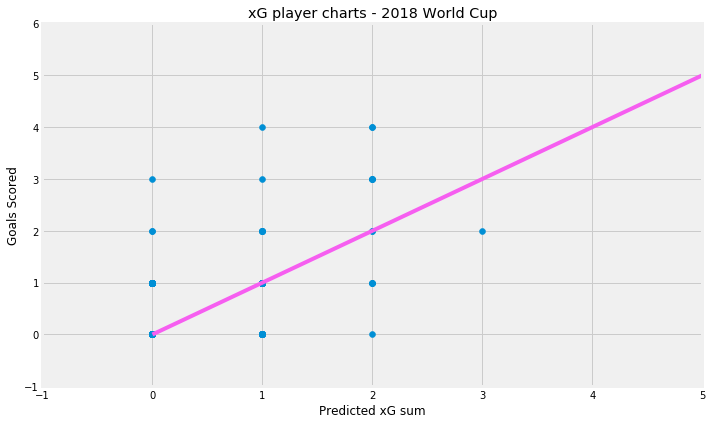

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(round(df_player_level_xG['xG_sum'],0),df_player_level_xG['goals'])
plt.plot([0,25],[0,25],color="#f65ef0")
plt.xlabel('Predicted xG sum')
plt.ylabel('Goals Scored')
plt.xlim([-1,5])
plt.ylim([-1,6])
# plt.annotate('Vivianne Miedema',xy=(16.3,21),xytext=(16.3,20))
# plt.annotate('Georgia Stanway',xy=(5.2,11),xytext=(5.2,11));
plt.title('xG player charts - 2018 World Cup');
plt.tight_layout()
plt.savefig('xg_player_charts.png')

Let's harness the power of xG to tell the story of a match


In [52]:
match_level_xg = df[['shot_x','shot_y','match_id','home_team','away_team','timestamp','shot_player','shot_team','isGoalBool','predicted_xg']]
home_or_away = []
for index, rows in match_level_xg.iterrows():
    if rows['shot_team']==rows['home_team']:
        home_or_away.append('home')
    else:
        home_or_away.append('away')

match_level_xg['home_or_away']=home_or_away

C:\Users\anike\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [53]:
match_level_xg.head()

,shot_x,shot_y,match_id,home_team,away_team,timestamp,shot_player,shot_team,isGoalBool,predicted_xg,home_or_away
0,97.0,53.0,7562,Australia,Peru,2020-04-19 00:04:17.267,Mile Jedinak,Australia,0,0.026704,home
1,95.0,46.0,7562,Australia,Peru,2020-04-19 00:11:27.587,Tom RogiÄ‡,Australia,0,0.019193,home
2,104.0,53.0,7562,Australia,Peru,2020-04-19 00:17:14.547,AndrÃ© MartÃ­n Carrillo DÃ­az,Peru,1,0.039793,away
3,112.0,42.0,7562,Australia,Peru,2020-04-19 00:20:00.707,Mathew Leckie,Australia,0,0.066272,home
4,109.0,37.0,7562,Australia,Peru,2020-04-19 00:24:07.787,JosÃ© Paolo Guerrero GonzÃ¡lez,Peru,0,0.123124,away


In [54]:
def time_series(df,home_or_away):
    '''
        Given the shots data from a match, this function reads the timestamp values 
        and returns the shot times for either the home or away team in the form of a list
    
    Arguments:
        df - shot data from a match with a 'home_or_away' column
        home_or_away - 'home' or 'away'
        
    Returns:
        time_series_final - list with time series for 'home' or 'away' team

    '''
    filt = df['home_or_away']==home_or_away
    df_time_series = df[filt]
    time_series_minutes = list(df_time_series.timestamp.dt.minute.values)
    time_series_final = []
    flag=0
    for i in range(0, len(time_series_minutes)):
        if i == 0:
            time_series_final.append(time_series_minutes[i])
        else:
            if flag == 0:
                if time_series_minutes[i] >= time_series_minutes[i - 1]:
                    time_series_final.append(time_series_minutes[i])
                else:
                    time_series_final.append(time_series_minutes[i] + 45)
                    flag = 1
            else:
                time_series_final.append(time_series_minutes[i] + 45)
        if i==len(time_series_minutes)-1:
            if time_series_final[i]<90:
                time_series_final.append(90)
                
    return time_series_final

In [55]:
def team_xg_accumulator(df,time_series, home_or_away):
    '''
    Given the shots data from a match and time series generated by the time_series function, 
    this function creates a list of cumulative xG for either the home or the away team
    
    Arguments:
        df - shot data from a match with a 'home_or_away' column
        time_series - time series list for either the 'home' or 'away' team
        home_or_away - 'home' or 'away'
        
    Returns:
        xg_sum - list of cumulative xG

    '''
    filt=df['home_or_away']==home_or_away
    df_team_shots = df[filt]
    xg_list=list(df_team_shots['predicted_xg'].values)
    xg_sum=[]
    for i in range(0,len(xg_list)):
        if i==0:
            xg_sum.append(xg_list[i])
        else:
            xg_sum.append(xg_list[i]+xg_sum[i-1])
        
    
    if len(xg_sum)<len(time_series):
        xg_sum.append(xg_sum[-1])
    return xg_sum

In [57]:
filt1 = match_level_xg.home_team == 'France'
filt2 = match_level_xg.away_team == 'Argentina'
filt3 = filt1 & filt2
df_fra_arg=match_level_xg[filt3]
df_fra_arg

,shot_x,shot_y,match_id,home_team,away_team,timestamp,shot_player,shot_team,isGoalBool,predicted_xg,home_or_away
575,96.0,27.0,7580,France,Argentina,2020-04-19 00:21:21.027,Ã‰ver Maximiliano David Banega,Argentina,0,0.025189,away
576,90.0,38.0,7580,France,Argentina,2020-04-19 00:40:43.280,Ã�ngel FabiÃ¡n Di MarÃ­a HernÃ¡ndez,Argentina,1,0.014862,away
577,104.0,56.0,7580,France,Argentina,2020-04-19 00:02:35.187,Lionel AndrÃ©s Messi Cuccittini,Argentina,0,0.054062,away
578,111.0,42.0,7580,France,Argentina,2020-04-19 00:02:35.760,Gabriel IvÃ¡n Mercado,Argentina,1,0.342773,away
579,116.0,45.0,7580,France,Argentina,2020-04-19 00:10:12.667,Antoine Griezmann,France,0,0.357022,home
580,100.0,56.0,7580,France,Argentina,2020-04-19 00:11:48.467,Benjamin Pavard,France,1,0.015962,home
581,108.0,35.0,7580,France,Argentina,2020-04-19 00:18:06.067,Blaise Matuidi,France,0,0.039985,home
582,112.0,30.0,7580,France,Argentina,2020-04-19 00:18:08.720,Kylian MbappÃ© Lottin,France,1,0.135469,home
584,96.0,22.0,7580,France,Argentina,2020-04-19 00:20:58.867,Lionel AndrÃ©s Messi Cuccittini,Argentina,0,0.014838,away
585,107.0,51.0,7580,France,Argentina,2020-04-19 00:22:49.600,Kylian MbappÃ© Lottin,France,1,0.100208,home


Now, let's do a time trend plotting each team's cumulative xG and annotating points in time when goals were scored

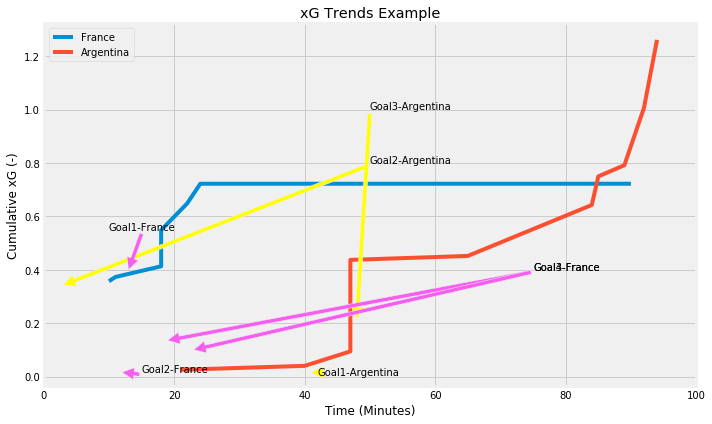

In [69]:
time_series_home=time_series(df_fra_arg,'home')
time_series_away=time_series(df_fra_arg,'away')


xg_sum_home = team_xg_accumulator(df_fra_arg,time_series_home,'home')
xg_sum_away = team_xg_accumulator(df_fra_arg,time_series_away,'away')

plt.figure(figsize=(10,6))

plt.plot(time_series_home,xg_sum_home,label='France');
plt.plot(time_series_away,xg_sum_away,label='Argentina');

plt.xlim([0,100])

plt.annotate('Goal1-Argentina',xy=(41,0.014862),xytext=(42,0.004),arrowprops=dict(facecolor='yellow'))
plt.annotate('Goal2-Argentina',xy=(3,0.342773),xytext=(50,0.8),arrowprops=dict(facecolor='yellow'))
plt.annotate('Goal3-Argentina',xy=(48,0.214736),xytext=(50,1.0),arrowprops=dict(facecolor='yellow'))

plt.annotate('Goal1-France',xy=(13,0.4),xytext=(10,0.55),arrowprops=dict(facecolor='#f65ef0'))
plt.annotate('Goal2-France',xy=(12,0.015962),xytext=(15,0.015),arrowprops=dict(facecolor='#f65ef0'))
plt.annotate('Goal3-France',xy=(19,0.135469),xytext=(75,0.4),arrowprops=dict(facecolor='#f65ef0'))
plt.annotate('Goal4-France',xy=(23,0.100208),xytext=(75,0.4),arrowprops=dict(facecolor='#f65ef0'))

plt.xlabel('Time (Minutes)')
plt.ylabel('Cumulative xG (-)')

plt.title('xG Trends Example')
plt.legend();
plt.tight_layout()
plt.savefig('xg_trends.png')



Another way of visualizing this match story is to do a pitch plot and look at the positions where the shots were taken

In [70]:
from matplotlib.patches import Arc

def pitch_creator(size=(10,6)):
    with plt.style.context('bmh'):
        fig = plt.figure(figsize=size)
        plt.axis([60, 125, -10, 90])
        plt.grid(False)


        plt.plot([60, 60], [0, 80], color='black')
        plt.plot([120, 120], [0, 80], color="black")
        plt.plot([60, 120], [0, 0], color='black')
        plt.plot([60, 120], [80, 80], color='black')

        centreCircle = plt.Circle((60, 40), 10, color='black', fill=False)

        # right penalty area
        plt.plot([120, 102], [18, 18], color='black')
        plt.plot([102, 102], [18, 62], color='black')
        plt.plot([102, 120], [62, 62], color='black')

        # right six yard box
        plt.plot([120, 114], [30, 30], color='black')
        plt.plot([114, 114], [30, 50], color='black')
        plt.plot([114, 120], [50, 50], color='black')


        # right goal posts
        plt.plot([120, 122], [36, 36], color='black')
        plt.plot([120, 122], [44, 44], color='black')
        plt.plot([122, 122], [36, 44], color='black')


        # right Arc
        rightArc = Arc((108, 40), height=18.3, width=18.3, angle=0,
                       theta1=130, theta2=230, color='red')

        ax = plt.gca()
        ax.add_patch(centreCircle)
        ax.add_patch(rightArc)
        ax.set_ylim(ax.get_ylim()[::-1])
        return fig


In [71]:
df_home=df_fra_arg[df_fra_arg['home_or_away']=='home']
df_away=df_fra_arg[df_fra_arg['home_or_away']=='away']

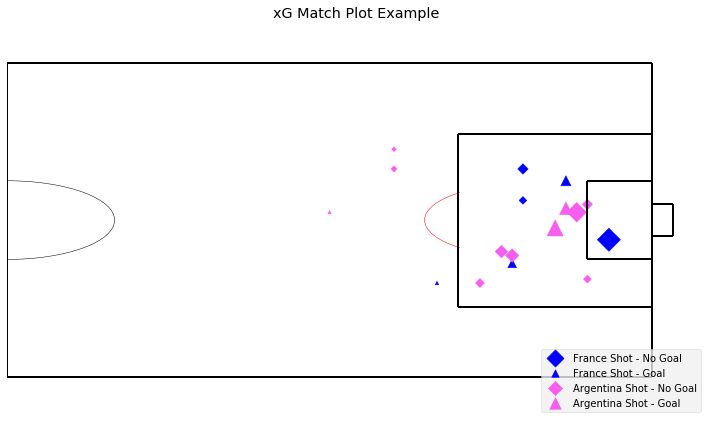

In [72]:

home_non_goals_x = df_home[df_home.isGoalBool==0].shot_x.values
home_non_goals_y = df_home[df_home.isGoalBool==0].shot_y.values
home_non_goals_xg = df_home[df_home.isGoalBool==0].predicted_xg.values

home_goals_x = df_home[df_home.isGoalBool==1].shot_x.values
home_goals_y = df_home[df_home.isGoalBool==1].shot_y.values
home_goals_xg = df_home[df_home.isGoalBool==1].predicted_xg.values

away_non_goals_x = df_away[df_away.isGoalBool==0].shot_x.values
away_non_goals_y = df_away[df_away.isGoalBool==0].shot_y.values
away_non_goals_xg = df_away[df_away.isGoalBool==0].predicted_xg.values

away_goals_x = df_away[df_away.isGoalBool==1].shot_x.values
away_goals_y = df_away[df_away.isGoalBool==1].shot_y.values
away_goals_xg = df_away[df_away.isGoalBool==1].predicted_xg.values


plt1=pitch_creator(size=(10,6))
plt1=plt.scatter(home_non_goals_x,home_non_goals_y, s=home_non_goals_xg*750,c="#0000ff",marker="D",label='France Shot - No Goal')
plt1=plt.scatter(home_goals_x,home_goals_y, s=home_goals_xg*750,c="#0000ff",marker="^",label='France Shot - Goal')

plt1=plt.scatter(away_non_goals_x,away_non_goals_y, s=away_non_goals_xg*750,c="#f65ef0",marker="D",label='Argentina Shot - No Goal')
plt1=plt.scatter(away_goals_x,away_goals_y, s=away_goals_xg*750,c="#f65ef0",marker="^",label='Argentina Shot - Goal')

plt.axis('off');
plt.legend(loc='lower right')
plt.title('xG Match Plot Example');
plt.tight_layout()
plt.savefig('xg_arg_fra_match.png')

Finally, let's use xG to evaluate all the teams who competed in the 2018 world cup.

In [75]:
season_xg=match_level_xg[['shot_team','isGoalBool','predicted_xg']].groupby('shot_team').sum()

season_xg = season_xg.round(1)
season_xg['xgDiff']=season_xg['isGoalBool']-season_xg['predicted_xg']
season_xg.columns=['Goals','Cumulative xG','xgDiff']
season_xg.sort_values(by='Cumulative xG',ascending=False)
# season_xg['Actual League Position'] = [1,4,9,6,3,10,8,2,5,7,11]
# season_xg.sort_values(by='Cumulative xG',ascending=False)

,Goals,Cumulative xG,xgDiff
shot_team,,,
Brazil,8,11.3,-3.3
Belgium,14,9.4,4.6
Croatia,11,8.2,2.8
England,8,6.9,1.1
Spain,7,6.7,0.3
Uruguay,5,5.8,-0.8
Germany,2,5.6,-3.6
France,9,5.5,3.5
Sweden,3,5.2,-2.2


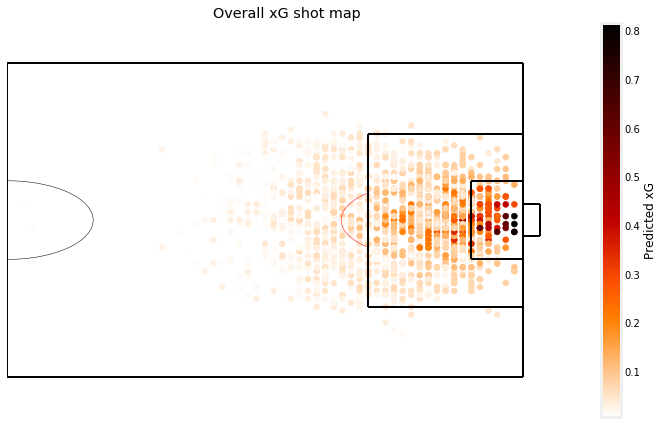

In [76]:
plt1 = pitch_creator()
plt1 = plt.scatter(df['shot_x'],df['shot_y'],c=df['predicted_xg'],cmap='gist_heat_r')
plt.axis('off')
cbar=plt.colorbar()
cbar.set_label('Predicted xG')
plt.title('Overall xG shot map');
plt.tight_layout()
plt.savefig('overallxGmap.png')

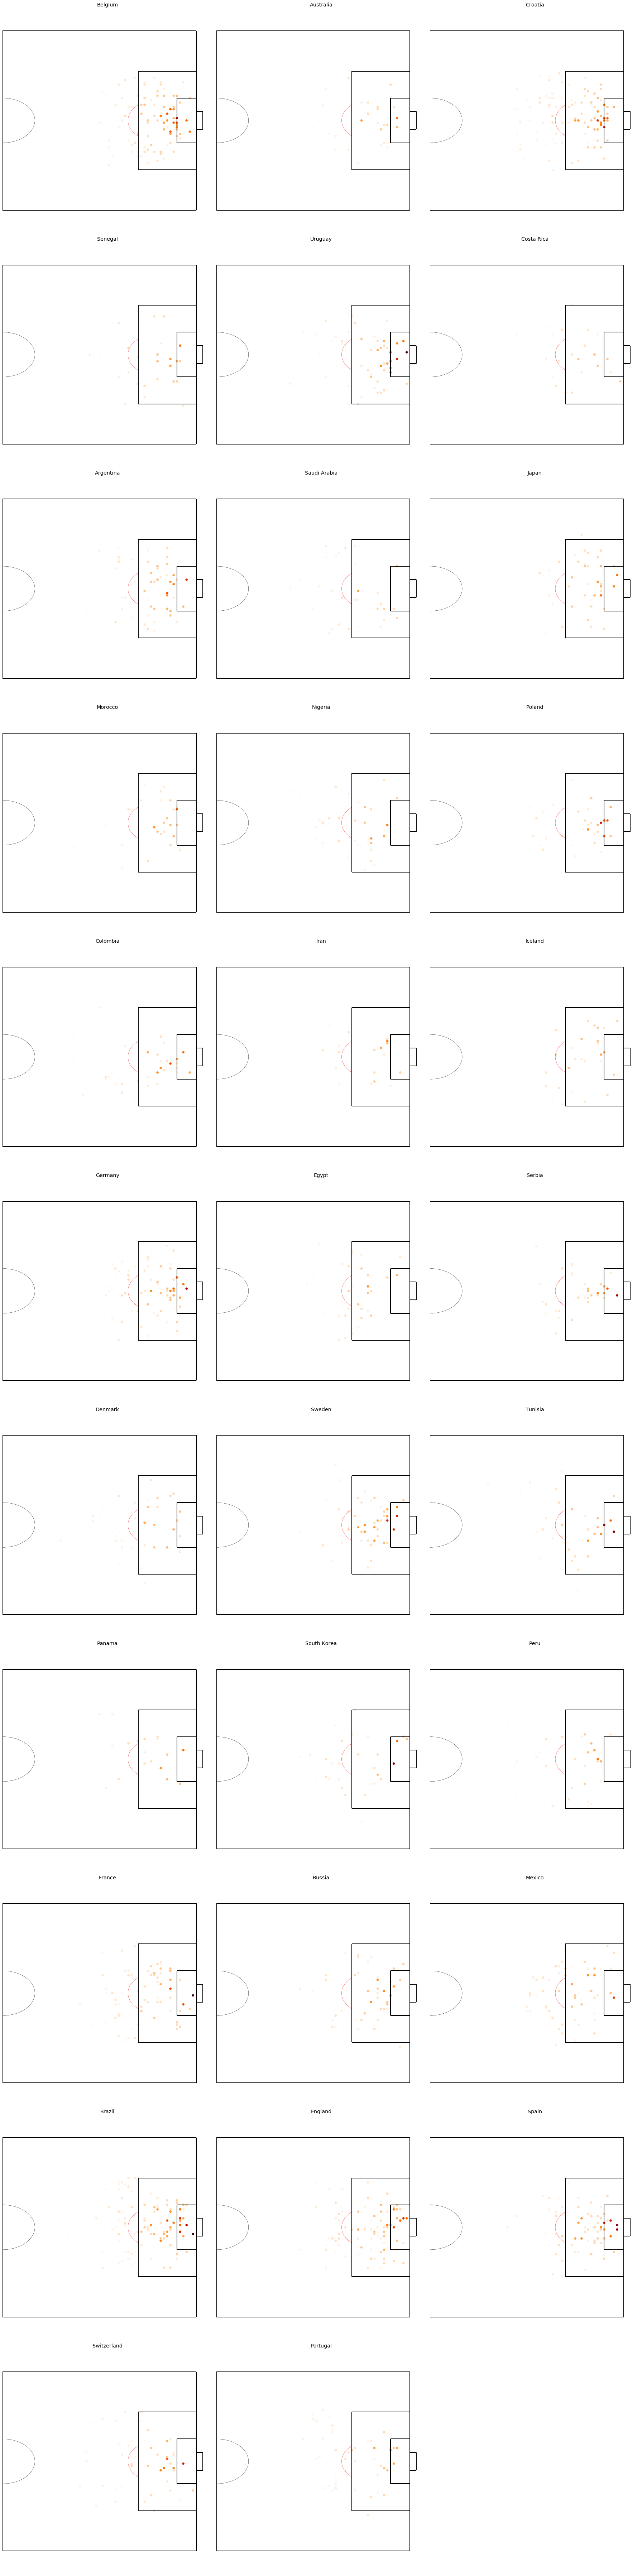

In [81]:
i=1
fig=plt.figure(figsize=(25,1000))
with plt.style.context('bmh'):
    for team in set(df.shot_team.values):
        filt1 = df.shot_team == team
        df_team = df[filt1]

        ax = fig.add_subplot(11,3,i)

        ax.axis([60, 125, -10, 90])
        ax.grid(False)


        ax.plot([60, 60], [0, 80], color='black')
        ax.plot([120, 120], [0, 80], color="black")
        ax.plot([60, 120], [0, 0], color='black')
        ax.plot([60, 120], [80, 80], color='black')

        centreCircle = plt.Circle((60, 40), 10, color='black', fill=False)

        # right penalty area
        ax.plot([120, 102], [18, 18], color='black')
        ax.plot([102, 102], [18, 62], color='black')
        ax.plot([102, 120], [62, 62], color='black')

        # right six yard box
        ax.plot([120, 114], [30, 30], color='black')
        ax.plot([114, 114], [30, 50], color='black')
        ax.plot([114, 120], [50, 50], color='black')


        # right goal posts
        ax.plot([120, 122], [36, 36], color='black')
        ax.plot([120, 122], [44, 44], color='black')
        ax.plot([122, 122], [36, 44], color='black')


        # right Arc
        rightArc = Arc((108, 40), height=18.3, width=18.3, angle=0,
                       theta1=130, theta2=230, color='red')

        ax = plt.gca()
        ax.add_patch(centreCircle)
        ax.add_patch(rightArc)
        ax.set_ylim(ax.get_ylim()[::-1])


        ax.scatter(df_team['shot_x'],df_team['shot_y'],c=df_team['predicted_xg'],cmap='gist_heat_r',vmin=0,vmax=1)
        ax.axis('off')

        ax.set_title(team)
        i+=1

plt.tight_layout()
plt.savefig('xg_allteams.png')